In [30]:
using FITSIO, FITSTables, DataFrames, PyPlot

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/aw/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [3]:
df = FITS(f->DataFrame(f[2]), "../cats/LAMOST-dr5-v3-stellar.fits.gz");

In [25]:
groups = groupby(df, :designation);

In [28]:
groups = groups[map(g->size(g, 1) > 1, collect(groups))];

In [50]:
cols = [
        :snru
       ,:snrg
       ,:snrr
       ,:snri
       ,:snrz
       #,:offsets
       #,:offset_v
       ,:teff
       ,:teff_err
       ,:logg
       ,:logg_err
       ,:feh
       ,:feh_err
       ,:rv
       ,:rv_err]
;

In [59]:
diffs = map(collect(groups)) do group
    imax = argmax(group.snrz)
    imin = argmin(group.snrz)
    if (group.snrz[imax] > 300) & (group.snrz[imin] < 50)
        collect(group[imax, cols]) .- collect(group[imin, cols])
    else
        NaN
    end
end

746837-element Array{Any,1}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [65]:
sdiffs = reduce(vcat, transpose.(diffs[typeof.(diffs) .== Array{Float32, 1}]));

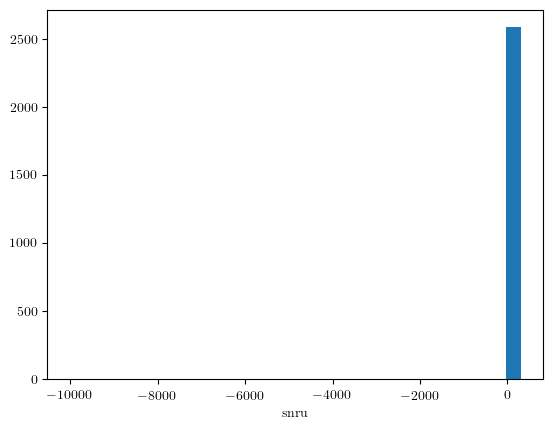

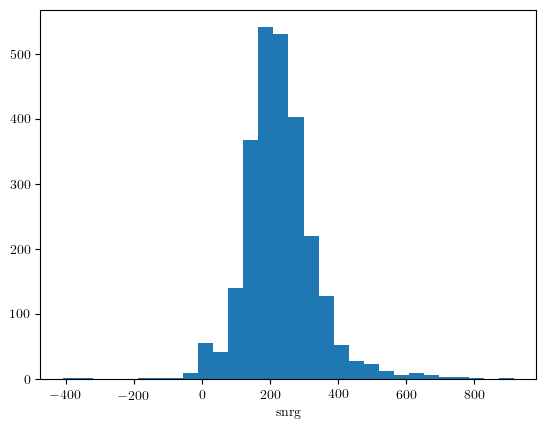

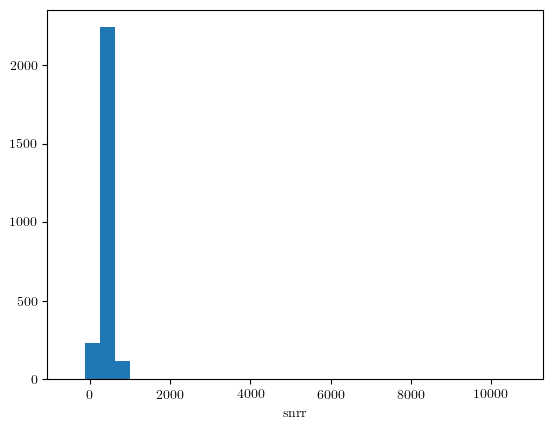

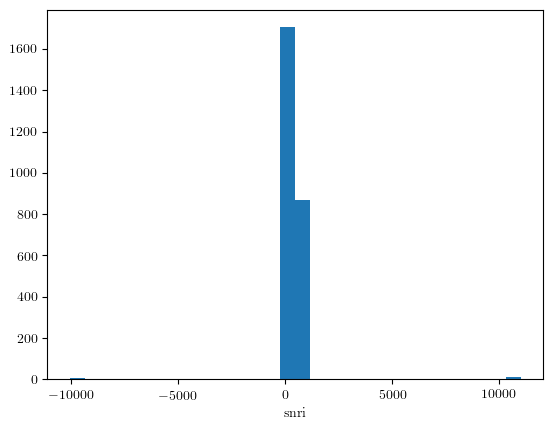

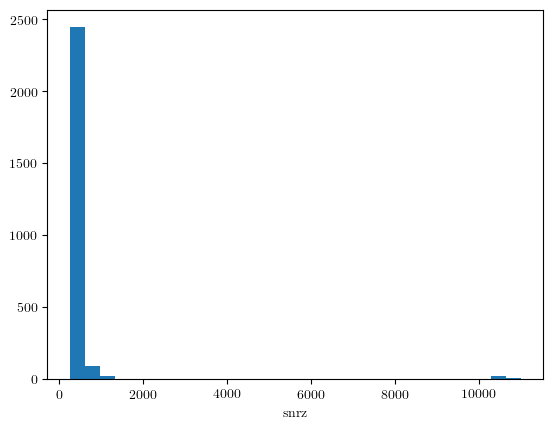

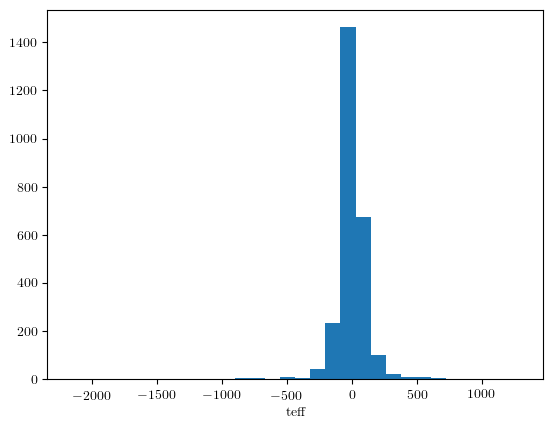

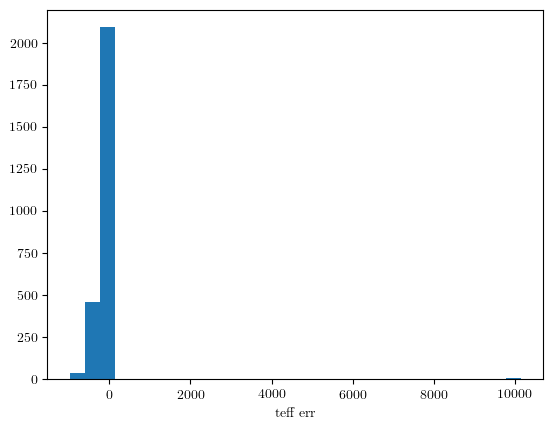

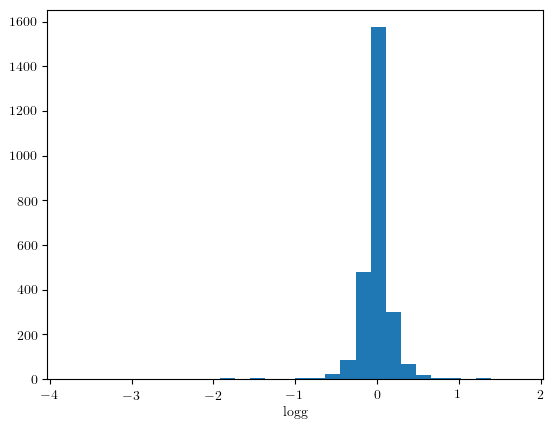

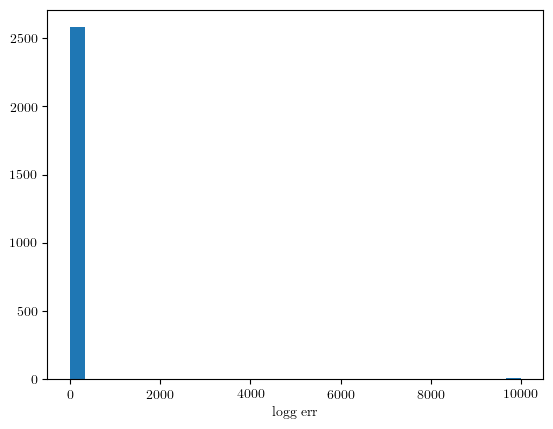

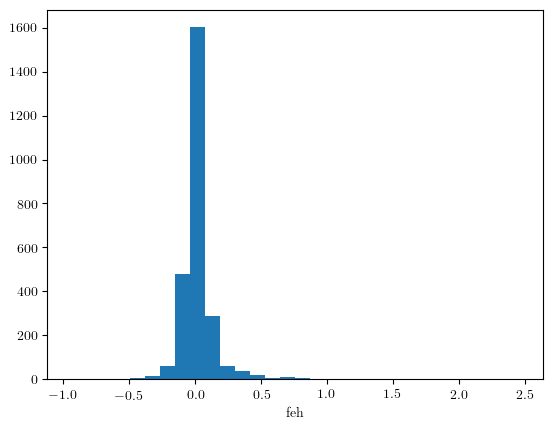

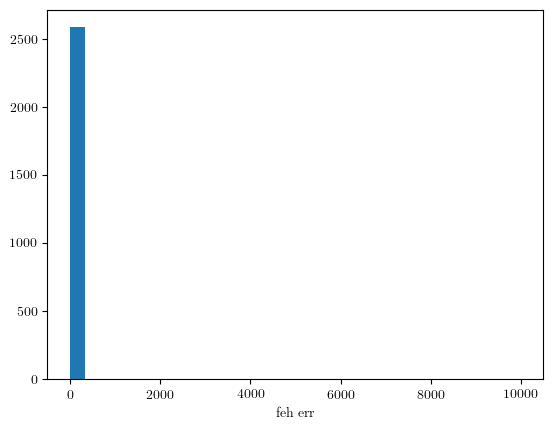

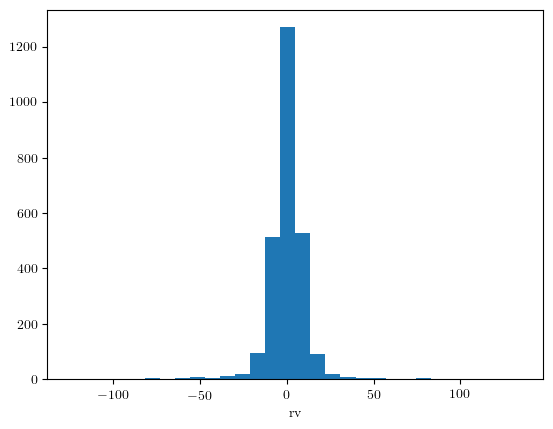

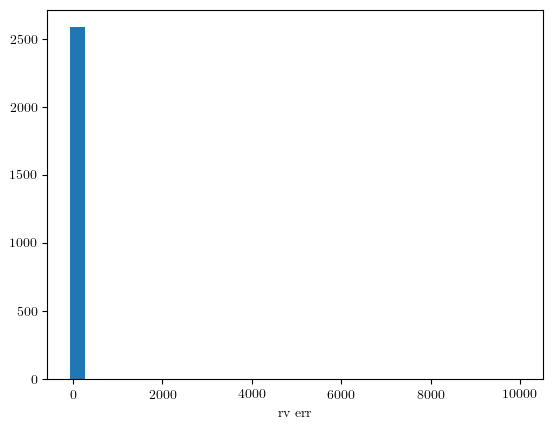

In [75]:
for (name, col) in zip(cols, eachcol(sdiffs))
    figure()
    plt.hist(col[.! isnan.(col)], bins=30)
    xlabel(replace(String(name), "_"=>" "))
end

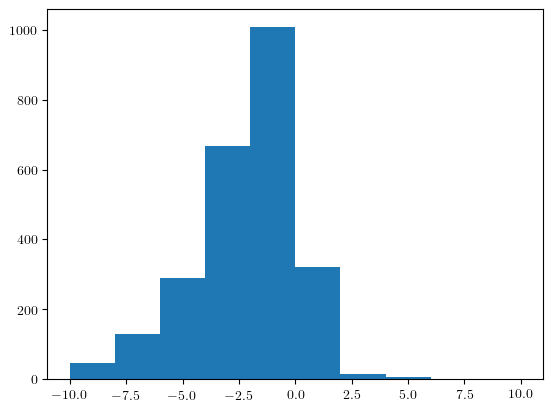

([46.0, 128.0, 290.0, 669.0, 1009.0, 322.0, 14.0, 5.0, 1.0, 0.0], Float32[-10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x190d3dbe0>, PyObject <matplotlib.patches.Rectangle object at 0x13a0890b8>, PyObject <matplotlib.patches.Rectangle object at 0x190d3deb8>, PyObject <matplotlib.patches.Rectangle object at 0x190d49518>, PyObject <matplotlib.patches.Rectangle object at 0x190d49860>, PyObject <matplotlib.patches.Rectangle object at 0x190d49ba8>, PyObject <matplotlib.patches.Rectangle object at 0x190d49ef0>, PyObject <matplotlib.patches.Rectangle object at 0x190d49f60>, PyObject <matplotlib.patches.Rectangle object at 0x190d595f8>, PyObject <matplotlib.patches.Rectangle object at 0x190d59908>])

In [76]:
plt.hist(sdiffs[:, end], range=[-10, 10])